In [86]:
import numpy as np
import matplotlib.pyplot as plt

#LEFT, RIGHT = -3, 3
LEFT, RIGHT = -1, 1
Y_LIM_UP, Y_LIM_DOWN = 1, -0.25
EPS = 0.5
def F(x):
    return np.sin(x)

def F1(x):
    return 1 / (1 + (25 * x * x))

def multy(nodes, i, x=None):
    _res = 1.0
    for j in range(len(nodes)):
        if (i != j) and x is None:
            _res *= nodes[i] - nodes[j]
        elif (i != j):
            _res *= x - nodes[j]
    return _res

def Lougerange(x, nodes, my_func):
    _sum = 0
    for i in range(len(nodes)):
        _sum += (multy(nodes, i, x) * my_func(nodes[i]) / multy(nodes, i))
    return _sum

In [87]:
def draw_plot(_fig, _ax, objs):
    nodes = objs[0]
    _ax.plot(nodes, list(map(lambda x: F(x), nodes)))

def filter_axis(nodes, my_func, snodes):
    return list(filter(lambda x: abs(my_func(x) - Lougerange(x, snodes, my_func)) <= EPS, nodes))

def draw_granitza(_fig, _ax, n, x):
    _ax.plot([x] * n, np.linspace(Y_LIM_DOWN, Y_LIM_UP, n), c='r')
    _ax.plot([-x] * n, np.linspace(Y_LIM_DOWN, Y_LIM_UP, n), c='r')

def draw_diff(n, my_func, _fsize=(20, 9)):
    fig, ax = plt.subplots(figsize=_fsize)
    nodes = np.linspace(LEFT, RIGHT, n + 1)
    nodes_1 = np.linspace(LEFT, RIGHT, (2 * n + 1))

    ax.plot(nodes_1, list(map(lambda x: my_func(x), nodes_1)), color='r', 
                            linewidth=2, label='my_func')
                            
    ax.plot(nodes_1, list(map(lambda x: Lougerange(x, nodes, my_func), nodes_1)), 
                            '--', linewidth=2, label='интерполяция',
                            color='b')
    ax.plot(nodes_1, list(map(lambda x: Lougerange(x, nodes, my_func), nodes_1)), 'ro',
                             linewidth=6, color='m')
    new_nodes = filter_axis(nodes_1, my_func, nodes)
    print(len(new_nodes), len(nodes_1) , new_nodes, sep='\n')
    draw_granitza(fig, ax, 30, 0.65)
    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.ylim(Y_LIM_DOWN, Y_LIM_UP)
    plt.legend()
    plt.show()


def draw_graphics(n, _fsize=(20, 9), plot_settings=draw_plot):
    fig, ax = plt.subplots(figsize=_fsize)
    interpolation_nodes = np.linspace(LEFT, RIGHT, n)
    plot_settings(fig, ax, interpolation_nodes)
    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.show()
    plt.ylim()



In [88]:
def draw_graphics_sin():
    pass

def draw_graphics_p_x():
    pass

In [89]:
def main(n):
   #draw_graphics_sin()
   #draw_graphics_p_x()
   # draw_diff(n, F)
   draw_diff(n, F1)

C:\Users\BOGDAN\AppData\Local\Temp/ipykernel_3556/1098150626.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(nodes_1, list(map(lambda x: Lougerange(x, nodes, my_func), nodes_1)), 'ro',


19
21
[-1.0, -0.8, -0.7, -0.6, -0.5, -0.3999999999999999, -0.29999999999999993, -0.19999999999999996, -0.09999999999999998, 0.0, 0.10000000000000009, 0.20000000000000018, 0.30000000000000004, 0.40000000000000013, 0.5, 0.6000000000000001, 0.7000000000000002, 0.8, 1.0]


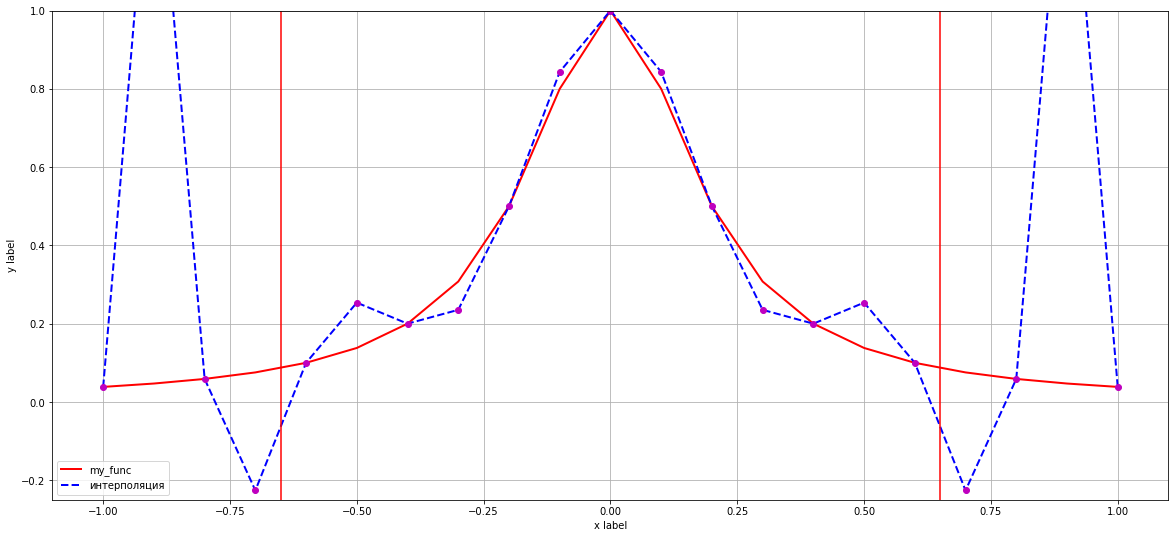

In [90]:
main(int(input()))